# SKAL! model inference

## Input variables

In [1]:
import os

os.environ['TF_GPU_ALLOCATOR'] = "cuda_malloc_async"

subdirs = os.listdir(os.getcwd())
# little workaround. with a properlyb built package this should be useless
if "skal" not in subdirs:
    os.chdir("..")

In [2]:
config_path = "config/bigan/nanotwice.yaml"
weights_dir = "models/bigan/nanotwice"
test_img_path = "datasets/nanotwice/Anomalous/images/ITIA1101.tif"

## Loading detector

In [3]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

tf.keras.mixed_precision.set_global_policy('mixed_float16')

from skal.models.bigan import detector, loader
from skal.utils import utils
from skal.experiment.config import Config
from skal.visualization import plotters
from skal.models import model_choices
from skal.anomaly_map import ops

utils.set_gpu()
exp_params = utils.load_yaml_file(config_path)

config = Config(**exp_params)

loader = model_choices.LoaderFactory.get_loader(config.model['name'])
detector = loader.load_detector(config.detector, seed=config.seed, weights_dir=weights_dir)

2023-11-23 17:38:42.994531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


2023-11-23 17:38:45.170462: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.196460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.196752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.197286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
/usr/local/lib/python3.8/dist-packages/tensorflo

Physical devices cannot be modified after being initialized


2023-11-23 17:38:45.303540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.303774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.580713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.581035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 17:38:45.581050: I tensorflow/core/co

## Loading Test Image

(-0.5, 1023.5, 695.5, -0.5)

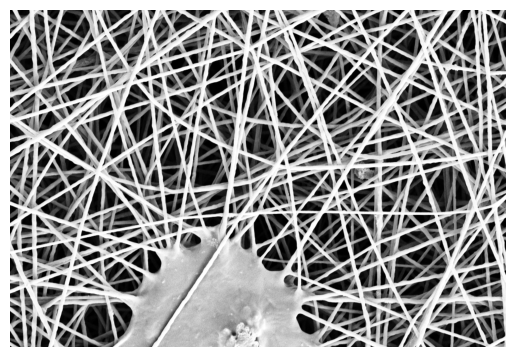

In [4]:

image = Image.open("datasets/nanotwice/Anomalous/images/ITIA1101.tif")
plt.imshow(np.array(image), cmap='gray')
plt.axis('off')

In [5]:
image = np.expand_dims(image, 0)
image = np.expand_dims(image, -1)

## Detector in action

In [6]:
anomaly_scores = detector.score_anomalies(image)
reconstructed_image = detector.model.reconstruct_images(image)

2023-11-23 17:38:49.592936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8906
2023-11-23 17:38:49.672580: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


## Visualizing Anomaly Scores

(-0.5, 1023.5, 699.5, -0.5)

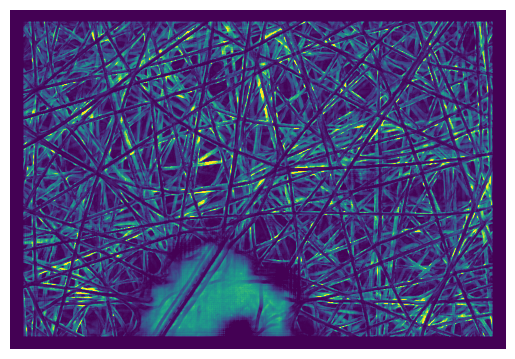

In [7]:
anomaly_img = ops.anomaly_map_to_img(np.array(anomaly_scores))
plt.imshow(np.array(anomaly_scores[0]), vmin=0, vmax=1.0)
plt.axis('off')

## Visualizing Reconstruction

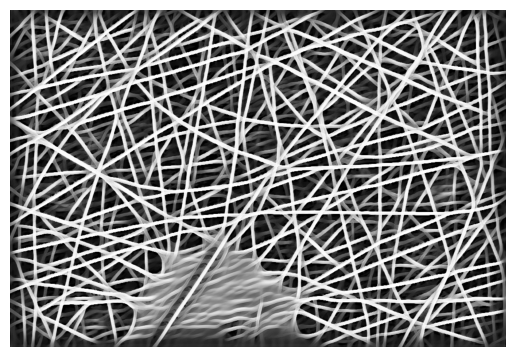

In [8]:
plt.imshow(reconstructed_image[0], cmap='gray')
plt.axis('off')
plt.show()